In [77]:
%pip install arima
%pip install pmdarima
%pip install statsmodels
%pip install neuralprophet




Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



ERROR: Could not find a version that satisfies the requirement arima (from versions: none)
ERROR: No matching distribution found for arima

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/145.8 kB ? eta -:--:--
   ---------------------------------------  143.4/145.8 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 145.8/145.8 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/65.9 MB 3.9 MB/s eta 0:00:17
   ---------------------------------------- 0.4/65.9 MB 3.7 MB/s eta 0:00:18
   ---------------------------------------- 0.5/65.9 MB 3.7 MB/s eta 0:00:18
   ---------------------------------------- 0.7/65.9 MB 3.8 MB/s eta 0:00:18
    --------------------------------------- 1.1/65.9 MB 4.9 MB/s eta 0:00:14
   - -------------------------------------- 1.7/65.9 MB 6.0 MB/s eta 0:00:11
   - -------------------------------------- 2.4/65.9 MB 7.1 MB/s eta 0:00:09
   - -------------------------------------- 3.0/65.9 MB 8.2 MB/s eta 0:00:08
   --


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

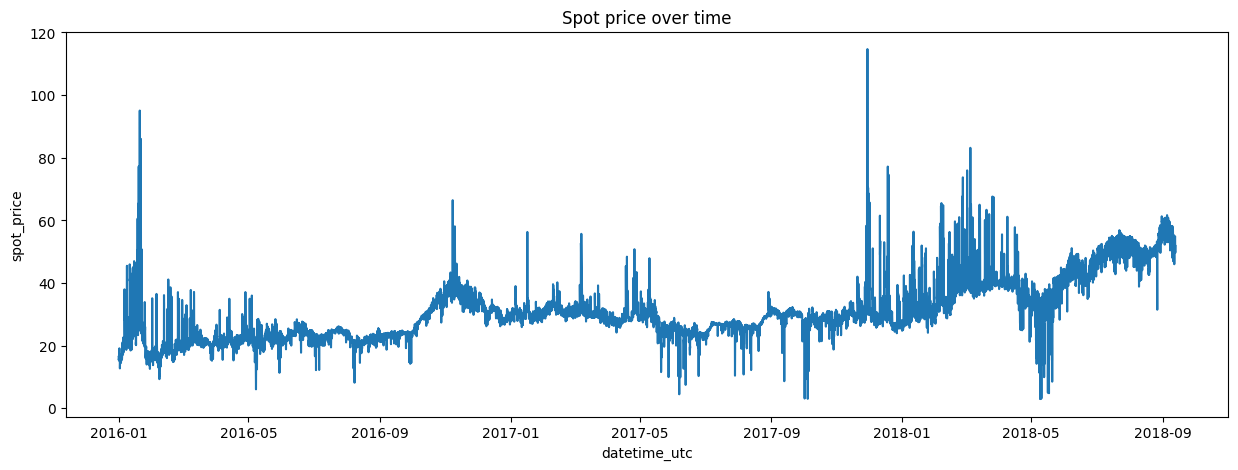

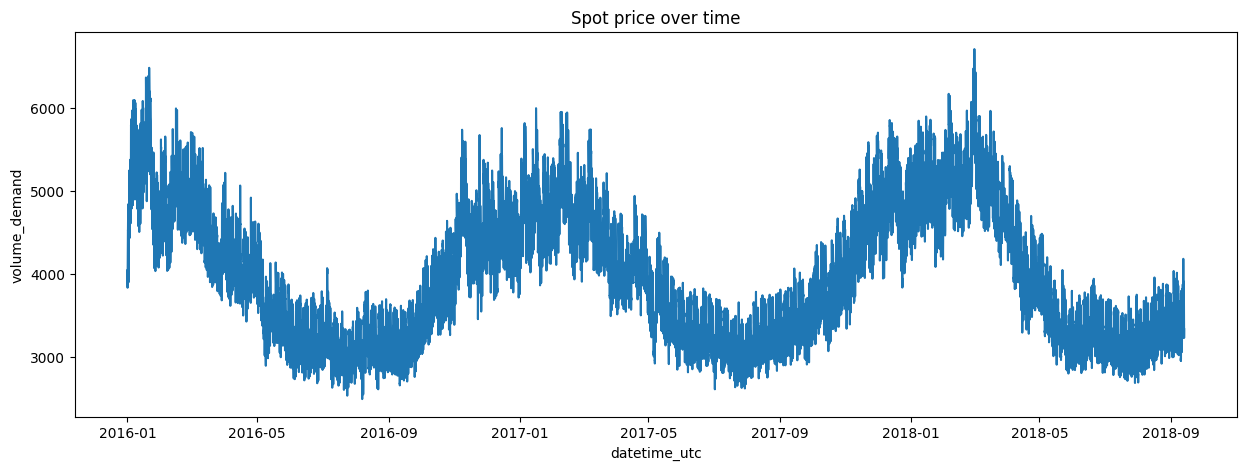

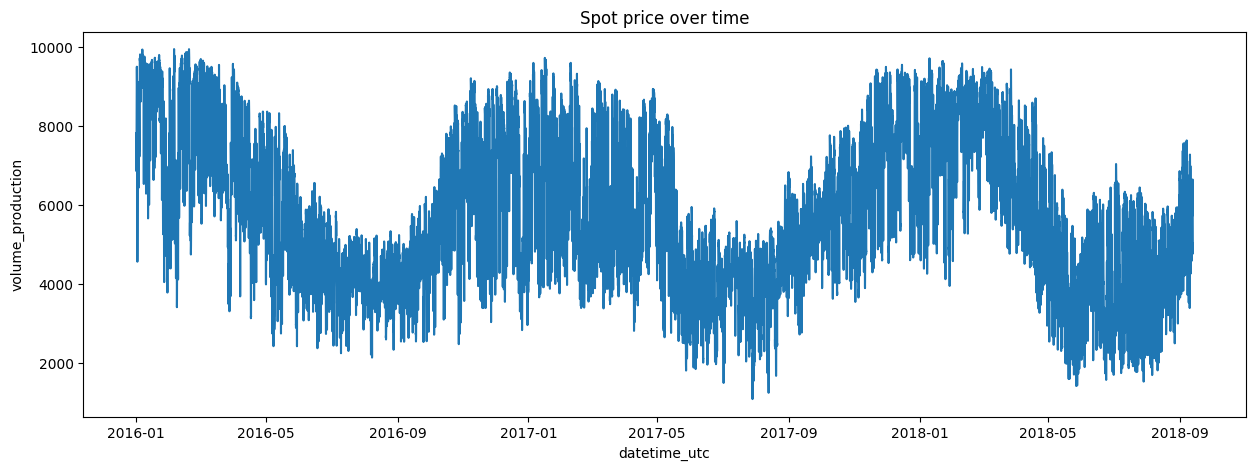

In [25]:

dataset = pd.read_csv('data_NO2.csv', sep=';')


dataset['datetime_utc'] = pd.to_datetime(dataset['datetime_utc'])
#dataset.drop('volume_demand', axis=1, inplace=True)
#dataset.drop('volume_production', axis=1, inplace=True)




plt.figure(figsize=(15, 5))
sns.lineplot(x='datetime_utc', y='spot_price', data=dataset)
plt.title('Spot price over time')
plt.show()

plt.figure(figsize=(15, 5))
sns.lineplot(x='datetime_utc', y='volume_demand', data=dataset)
plt.title('Spot price over time')
plt.show()


plt.figure(figsize=(15, 5))
sns.lineplot(x='datetime_utc', y='volume_production', data=dataset)
plt.title('Spot price over time')
plt.show()


dataset['year'] = dataset['datetime_utc'].dt.year
dataset['month'] = dataset['datetime_utc'].dt.month
dataset['day'] = dataset['datetime_utc'].dt.day
dataset['time'] = dataset['datetime_utc'].dt.time
dataset['time'] = dataset['datetime_utc'].dt.hour
dataset["spot_price_lag1"] = dataset['spot_price'].shift(1)
dataset["spot_price_lag2"] = dataset['spot_price'].shift(2)
dataset["spot_price_lag3"] = dataset['spot_price'].shift(3)
dataset["spot_price_lag4"] = dataset['spot_price'].shift(4)
dataset["spot_price_lag5"] = dataset['spot_price'].shift(5)

dataset.dropna(inplace=True)



cols = dataset.columns.tolist()
cols = cols[-1:] + cols[:-1] 
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
cols = cols[-1:] + cols[:-1]
dataset = dataset[cols]

dataset_for_plotting = dataset[['datetime_utc', 'spot_price']] 
dataset.drop('datetime_utc', axis=1, inplace=True)

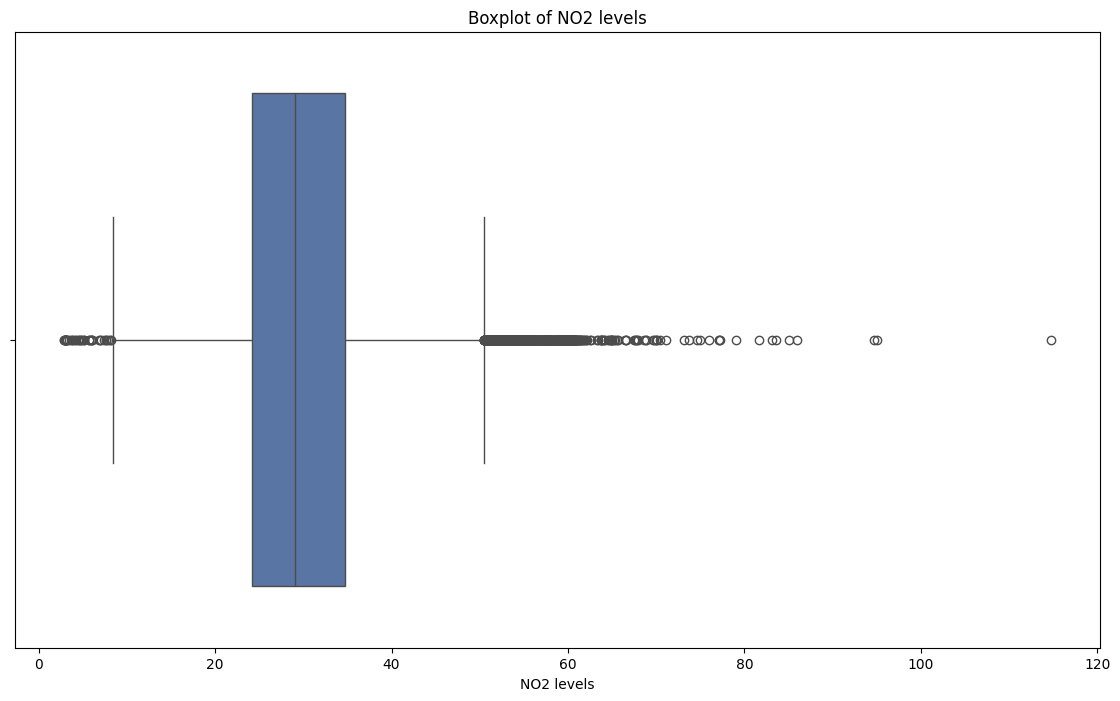

In [15]:
# outlier detection

plt.figure(figsize=(14, 8))
sns.boxplot(x='spot_price', data=dataset)
plt.title('Boxplot of NO2 levels')
plt.xlabel('NO2 levels')
plt.show()


C:\Users\rahim\AppData\Local\Temp\ipykernel_24796\2471125292.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_for_plotting['cluster'] = dbscan.labels_


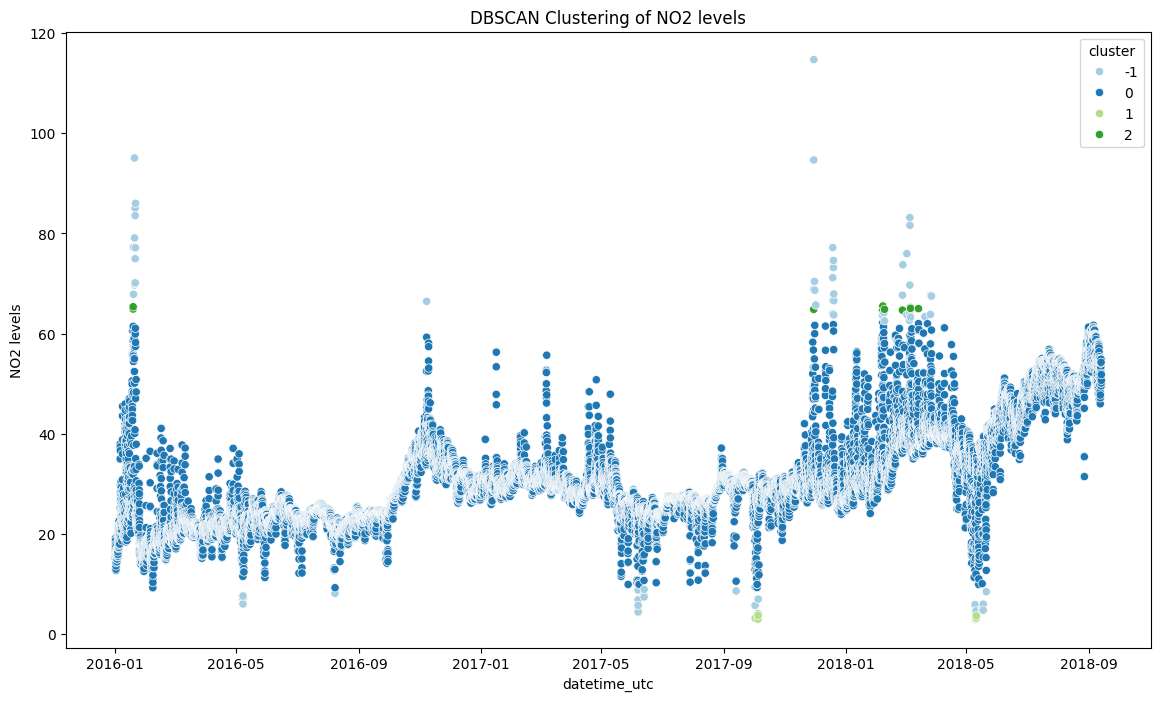

KeyError: 'cluster'

In [27]:
from sklearn.cluster import DBSCAN

# create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=10)

# fit the model

dataset_1 = dataset.copy()
dbscan.fit(dataset_1[['spot_price']])
dataset_for_plotting['cluster'] = dbscan.labels_



# plot the cluster
plt.figure(figsize=(14, 8))
sns.scatterplot(x='datetime_utc', y='spot_price', data=dataset_for_plotting, hue='cluster', palette="Paired")
plt.title('DBSCAN Clustering of NO2 levels')
plt.xlabel('datetime_utc')
plt.ylabel('NO2 levels')
plt.show()




# remove the outliers
dataset_1 = dataset_1[dataset_1['cluster'] != -1]
dataset_1.drop('cluster', axis=1, inplace=True)







In [28]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(dataset, test_size=0.2, random_state=42, shuffle=True)



y_train = train['spot_price']
y_test = test['spot_price']

X_train = train.drop('spot_price', axis=1)
X_test = test.drop('spot_price', axis=1)



X_train_1 = train.drop('spot_price', axis=1)
X_test_1 = test.drop('spot_price', axis=1)
y_train_1 = train['spot_price']
y_test_1 = test['spot_price']

Mean Squared Error: 1.7459489316105006


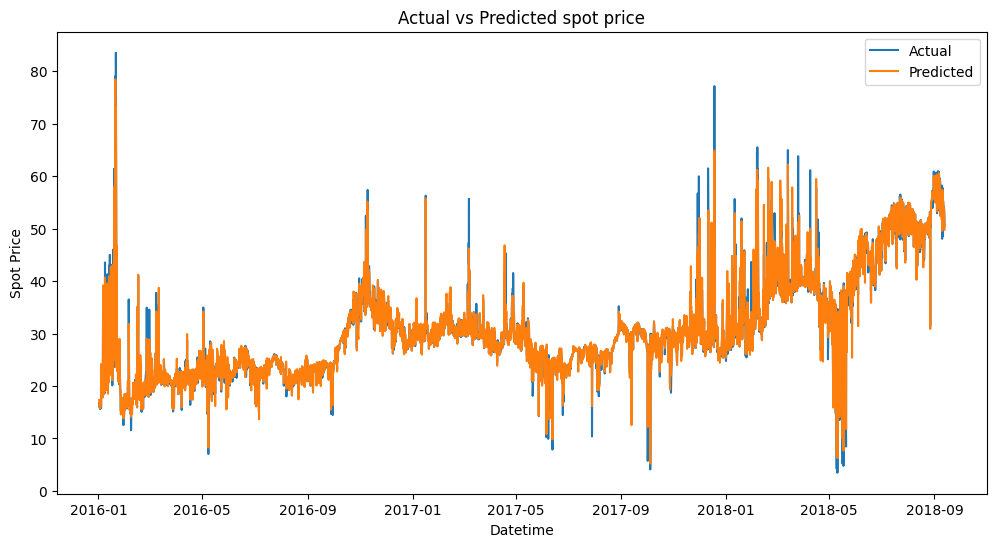

Mean Squared Error: 1.7459489316105006


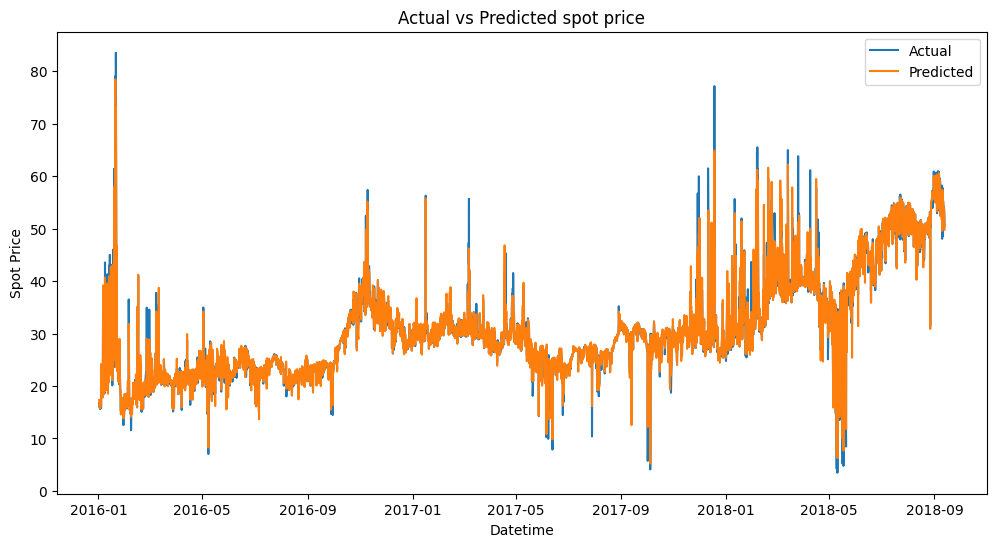

In [201]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import optuna


# create a random forest model


# use optuna to find the best hyperparameters
""" def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 150)
    max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print(study.best_params) """



model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

test_indices = test.index
test_with_datetime = dataset_for_plotting.loc[test_indices]
test_with_datetime['predicted_spot_price'] = y_pred

plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime_utc', y='spot_price', data=test_with_datetime, label='Actual')
sns.lineplot(x='datetime_utc',y='predicted_spot_price', data=test_with_datetime, label='Predicted')
plt.title('Actual vs Predicted spot price')
plt.xlabel('Datetime')
plt.ylabel('Spot Price')
plt.show()


model = RandomForestRegressor(random_state=42)
model.fit(X_train_1, y_train_1)

# make predictions
y_pred = model.predict(X_test_1)

# evaluate the model
mse = mean_squared_error(y_test_1, y_pred)
print(f'Mean Squared Error: {mse}')


test_with_datetime['predicted_spot_price'] = y_pred

plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime_utc', y='spot_price', data=test_with_datetime, label='Actual')
sns.lineplot(x='datetime_utc',y='predicted_spot_price', data=test_with_datetime, label='Predicted')

plt.title('Actual vs Predicted spot price')
plt.xlabel('Datetime')
plt.ylabel('Spot Price')
plt.show()

Mean Squared Error: 1.5216497630121828


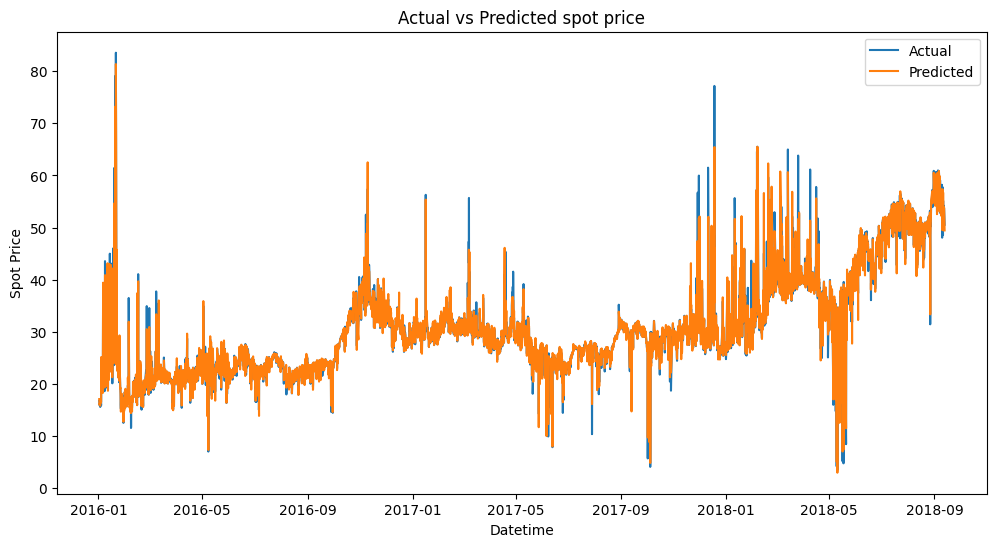

Mean Squared Error: 1.5216497630121828


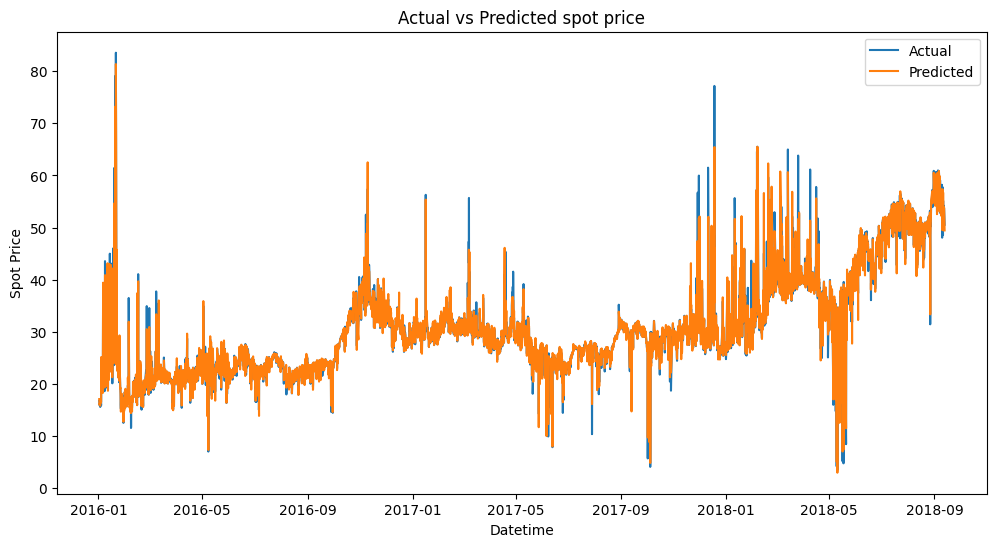

In [203]:
from sklearn.ensemble import GradientBoostingRegressor

# create a gradient boosting model
model = GradientBoostingRegressor(learning_rate=0.15200744571172792, n_estimators= 150, max_depth= 8, random_state=42)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

test_with_datetime['predicted_spot_price'] = y_pred

plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime_utc', y='spot_price', data=test_with_datetime, label='Actual')
sns.lineplot(x='datetime_utc',y='predicted_spot_price', data=test_with_datetime, label='Predicted')
plt.title('Actual vs Predicted spot price')
plt.xlabel('Datetime')
plt.ylabel('Spot Price')
plt.show()


model = GradientBoostingRegressor(learning_rate=0.15200744571172792, n_estimators= 150, max_depth= 8, random_state=42)
model.fit(X_train_1, y_train_1)

# make predictions
y_pred = model.predict(X_test_1)

# evaluate the model
mse = mean_squared_error(y_test_1, y_pred)
print(f'Mean Squared Error: {mse}')


test_with_datetime['predicted_spot_price'] = y_pred

plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime_utc', y='spot_price', data=test_with_datetime, label='Actual')
sns.lineplot(x='datetime_utc',y='predicted_spot_price', data=test_with_datetime, label='Predicted')
plt.title('Actual vs Predicted spot price')
plt.xlabel('Datetime')
plt.ylabel('Spot Price')
plt.show()



In [ ]:
from lightgbm import LGBMRegressor

# create a lightgbm model

def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.91, 1)
    
    model = LGBMRegressor(learning_rate=learning_rate, 
        n_estimators=142, max_depth=19, num_leaves=33, random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)


print("==============================================")
print(study.best_params, )



In [197]:
model = LGBMRegressor(random_state=42, learning_rate = 0.10098970302898683, n_estimators = 142, max_depth = 19, num_leaves = 33)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


test_with_datetime['predicted_spot_price'] = y_pred

plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime_utc', y='spot_price', data=test_with_datetime, label='Actual')
sns.lineplot(x='datetime_utc',y='predicted_spot_price', data=test_with_datetime, label='Predicted')
plt.title('Actual vs Predicted spot price')
plt.xlabel('Datetime')
plt.ylabel('Spot Price')
plt.show()



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1858
[LightGBM] [Info] Number of data points in the train set: 18929, number of used features: 11
[LightGBM] [Info] Start training from score 30.937102
Mean Squared Error: 2.052105054720396
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1858
[LightGBM] [Info] Number of data points in the train set: 15143, number of used features: 11
[LightGBM] [Info] Start training from score 30.936606
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_co

Mean Squared Error: 1.6914827298597064


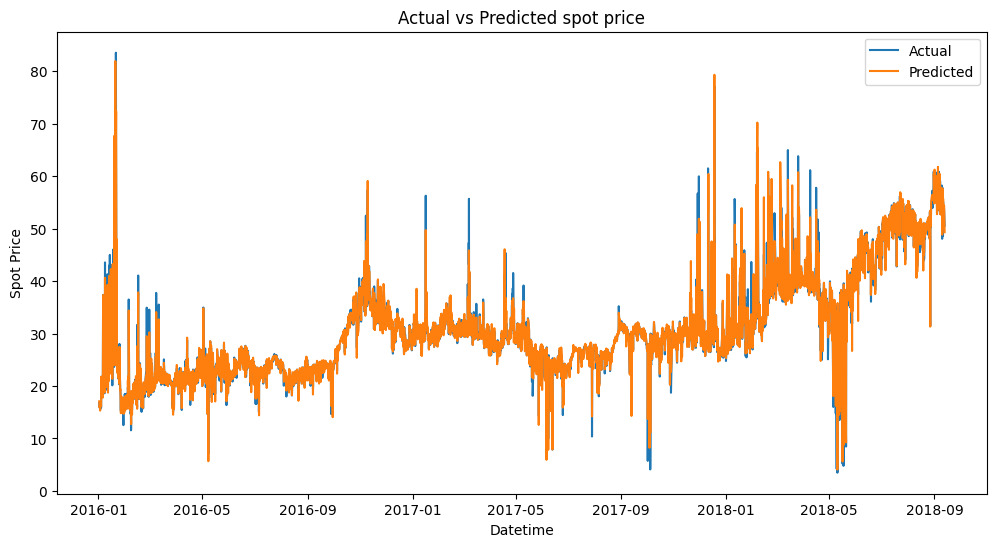

In [181]:
from xgboost import XGBRegressor

# create a xgboost model
model = XGBRegressor(learning_rate=0.20290470560630897, n_estimators= 132, max_depth= 6, random_state=42)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

test_indices = test.index
test_with_datetime = dataset_for_plotting.loc[test_indices]
test_with_datetime['predicted_spot_price'] = y_pred

plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime_utc', y='spot_price', data=test_with_datetime, label='Actual')
sns.lineplot(x='datetime_utc',y='predicted_spot_price', data=test_with_datetime, label='Predicted')
plt.title('Actual vs Predicted spot price')
plt.xlabel('Datetime')
plt.ylabel('Spot Price')
plt.show()


In [149]:
def objective(trial):
    learning_rate = trial.suggest_float('learning_rate', 0.1, 1)
    model = XGBRegressor(learning_rate=learning_rate, n_estimators= 132, max_depth= 6, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)


[I 2024-10-23 15:48:08,209] A new study created in memory with name: no-name-cd0b9908-4622-42c0-bc14-f8d7b82fa5bf
[I 2024-10-23 15:48:08,344] Trial 0 finished with value: 1.9231242024214819 and parameters: {'learning_rate': 0.1670646846873647}. Best is trial 0 with value: 1.9231242024214819.
[I 2024-10-23 15:48:08,467] Trial 1 finished with value: 2.4026400849084615 and parameters: {'learning_rate': 0.5976134241726104}. Best is trial 0 with value: 1.9231242024214819.
[I 2024-10-23 15:48:08,585] Trial 2 finished with value: 2.370258902092906 and parameters: {'learning_rate': 0.7517385714415855}. Best is trial 0 with value: 1.9231242024214819.
[I 2024-10-23 15:48:08,702] Trial 3 finished with value: 2.456018958097437 and parameters: {'learning_rate': 0.7155827830556727}. Best is trial 0 with value: 1.9231242024214819.
[I 2024-10-23 15:48:08,819] Trial 4 finished with value: 1.9265718465688304 and parameters: {'learning_rate': 0.21548587523160506}. Best is trial 0 with value: 1.9231242024

In [192]:


from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=43)

mse_scores = []

for train_index, test_index in kf.split(dataset):
    train = dataset.iloc[train_index]
    test = dataset.iloc[test_index]
    
    y_train = train['spot_price']
    y_test = test['spot_price']
    
    X_train = train.drop('spot_price', axis=1)
    X_test = test.drop('spot_price', axis=1)
    
    model = XGBRegressor(learning_rate=0.20290470560630897, n_estimators= 132, max_depth= 6, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    mse_scores.append(mse)


print(f'Mean Squared Error: {sum(mse_scores)/len(mse_scores)}')


Mean Squared Error: 2.287182235158334
Mean Squared Error: 1.7607001709117913
Mean Squared Error: 1.8395557979761625
Mean Squared Error: 2.133256931683633
Mean Squared Error: 2.0258322889699465
Mean Squared Error: 2.0093054849399734
